<a href="https://colab.research.google.com/github/MohamedNicer/Projet-de-fin-d-etude/blob/main/R%C3%A9seau_de_neurones_sur_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Préparation des outils à utiliser dans cette implémentation


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalization des valeur de pixels entre 0 et 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


# Visualisation de la dataset CIFAR-10

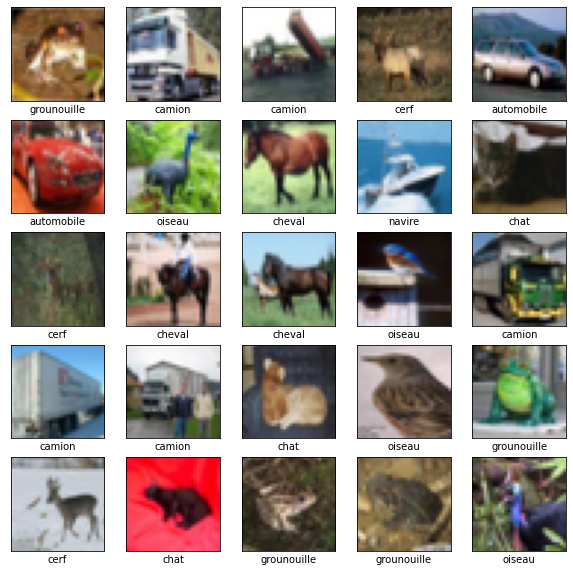

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#Préparer le réseau de neurones

In [ ]:
"""
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
"""
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32 , 3)),
    
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              6146048   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               3

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1563/1563 [==============================] - 224s 143ms/step - loss: 1.9609 - accuracy: 0.2696 - val_loss: 1.8179 - val_accuracy: 0.3377
Epoch 2/10
1563/1563 [==============================] - 228s 146ms/step - loss: 1.7910 - accuracy: 0.3507 - val_loss: 1.7521 - val_accuracy: 0.3640
Epoch 3/10
1563/1563 [==============================] - 230s 147ms/step - loss: 1.7036 - accuracy: 0.3848 - val_loss: 1.6782 - val_accuracy: 0.3985
Epoch 4/10
1563/1563 [==============================] - 233s 149ms/step - loss: 1.6409 - accuracy: 0.4096 - val_loss: 1.6666 - val_accuracy: 0.4111
Epoch 5/10
1563/1563 [==============================] - 230s 147ms/step - loss: 1.5952 - accuracy: 0.4252 - val_loss: 1.5957 - val_accuracy: 0.4191
Epoch 6/10
1563/1563 [==============================] - 226s 145ms/step - loss: 1.5604 - accuracy: 0.4395 - val_loss: 1.5743 - val_accuracy: 0.4356
Epoch 7/10
1563/1563 [==============================] - 223s 143ms/step - loss: 1.5224 - accuracy: 0.4536 - val_loss: 1.530

# Visualtion de l'accuracy

313/313 - 10s - loss: 1.5072 - accuracy: 0.4691


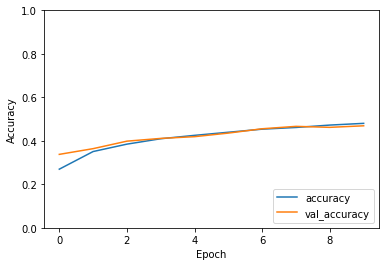

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.4690999984741211
